# Data Analysis on Amazon Reviews

In [9]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import wordcloud as wc
import nltk
from nltk.corpus import stopwords

In [10]:
#reading data
df = pd.read_csv("Amazon_Reviews_Raw.csv")
df.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [3]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [4]:
df.shape

(568454, 10)

In [11]:
#remove unnecessary columns
df1 = df.drop(columns=['Id','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator'])
df1.head(5)


,ProductId,UserId,Score,Time,Summary,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [12]:
df1[['Score','Time']].describe()

,Score,Time
count,568454.000000,5.684540e+05
mean,4.183199,1.296257e+09
std,1.310436,4.804331e+07
min,1.000000,9.393408e+08
25%,4.000000,1.271290e+09
50%,5.000000,1.311120e+09
75%,5.000000,1.332720e+09
max,5.000000,1.351210e+09


In [7]:
df1.isnull().sum()

ProductId     0
UserId        0
Score         0
Time          0
Summary      27
Text          0
dtype: int64

In [8]:
df1['Summary']=df1['Summary'].fillna('No summary provided')
df1.isnull().sum()

ProductId    0
UserId       0
Score        0
Time         0
Summary      0
Text         0
dtype: int64

In [9]:
#convert datatypes of column "TIME"
df1['Time'] = pd.to_datetime(df1['Time'],unit='s')
df1['Time']

0        2011-04-27
1        2012-09-07
2        2008-08-18
3        2011-06-13
4        2012-10-21
            ...    
568449   2011-03-09
568450   2012-03-09
568451   2012-02-21
568452   2012-03-13
568453   2012-05-31
Name: Time, Length: 568454, dtype: datetime64[ns]

In [15]:
#Remove special characters, multiple spaces, lowercase text
import re                #regular expression

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = re.sub(r"\s+", " ", text)
    return text
df1["clean_summary"] = df1['Summary'].apply(clean_text)
df1["clean_text"] = df1['Text'].apply(clean_text)
df1.head(5)


,ProductId,UserId,Score,Time,Summary,Text,clean_summary,clean_text
0,B001E4KFG0,A3SGXH7AUHU8GW,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,good quality dog food,i have bought several of the vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,not as advertised,product arrived labeled as jumbo salted peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,delight says it all,this is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,cough medicine,if you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,great taffy,great taffy at a great price there was a wide ...


In [13]:
df1['star rating']=df1['Score'].apply(lambda x:"★" * int(x))

In [17]:
df1[['Score','star rating']].head()

,Score,star rating
0,5,★★★★★
1,1,★
2,4,★★★★
3,2,★★
4,5,★★★★★


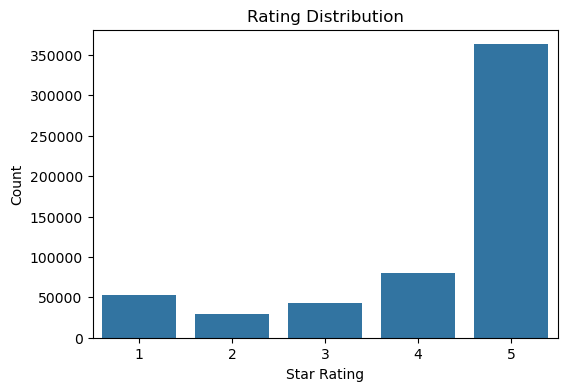

In [25]:
#visualization
plt.figure(figsize=(6,4))
sns.countplot(x="Score", data=df)
plt.title("Rating Distribution")
plt.xlabel("Star Rating")
plt.ylabel("Count")
plt.show()

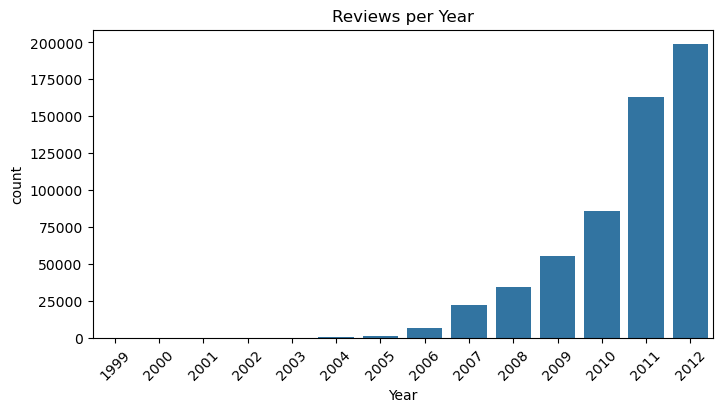

In [26]:
df1["Year"] = df1["Time"].dt.year

plt.figure(figsize=(8,4))
sns.countplot(x=df1["Year"])
plt.title("Reviews per Year")
plt.xticks(rotation=45)
plt.show()

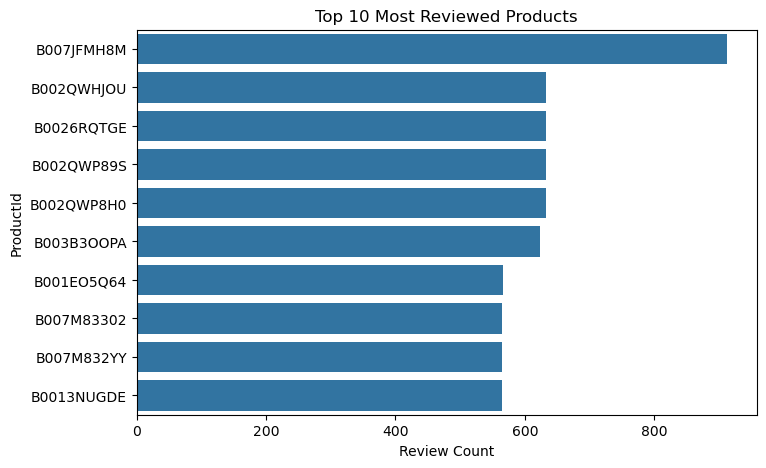

In [33]:
top_products = df1["ProductId"].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Most Reviewed Products")
plt.xlabel("Review Count")
plt.ylabel("ProductId")
plt.show()


In [17]:
df

dtype('int64')